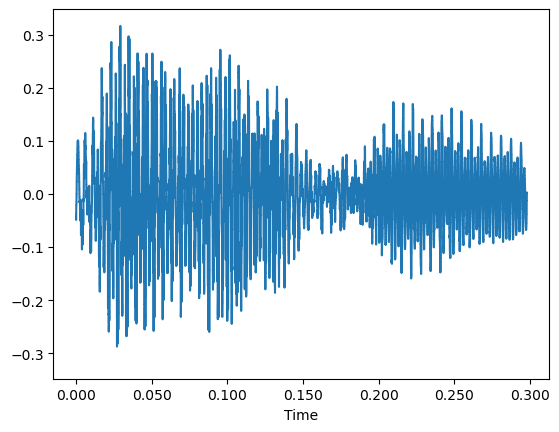

In [18]:
import os
from librosa import display
import librosa
from librosa.display import waveshow
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

file = './recordings_dataset/0_george_0.wav'
data, sr = librosa.load(file)

waveshow(data, sr=sr)

In [9]:
path = './recordings_dataset/'

files = []
labels = []

for i in os.listdir(path):
    files.append(i)
    labels.append(i[0])

In [12]:
extracted_features_list = []

def feature_extractor(file_name):
    data, sr = librosa.load('./recordings_dataset/'+file_name)
    extracted_features = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=40)
    extracted_features_ = np.mean(extracted_features.T, axis=0)
    
    return extracted_features_

In [13]:
for i in files:
    extracted_features_list.append(feature_extractor(i))

In [14]:
X = np.array(extracted_features_list)
y = np.array(labels)

In [16]:
y = np.array(pd.get_dummies(y))

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [22]:
# Training the deep learning model

In [26]:
from tensorflow import keras 
from tensorflow.keras.layers import Dense, Flatten, Dropout 

model = keras.Sequential()

model.add(Dense(100, activation='relu', input_shape=(40,)))
model.add(Flatten())

model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

In [27]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [28]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
71/71 [==============================] - 1s 2ms/step - loss: 14.7299 - accuracy: 0.1173
Epoch 2/100
71/71 [==============================] - 0s 2ms/step - loss: 2.3821 - accuracy: 0.1604
Epoch 3/100
71/71 [==============================] - 0s 2ms/step - loss: 2.1194 - accuracy: 0.2196
Epoch 4/100
71/71 [==============================] - 0s 2ms/step - loss: 2.0128 - accuracy: 0.2511
Epoch 5/100
71/71 [==============================] - 0s 2ms/step - loss: 1.9512 - accuracy: 0.2804
Epoch 6/100
71/71 [==============================] - 0s 2ms/step - loss: 1.8648 - accuracy: 0.3187
Epoch 7/100
71/71 [==============================] - 0s 2ms/step - loss: 1.8555 - accuracy: 0.3222
Epoch 8/100
71/71 [==============================] - 0s 2ms/step - loss: 1.7899 - accuracy: 0.3396
Epoch 9/100
71/71 [==============================] - 0s 2ms/step - loss: 1.7249 - accuracy: 0.3609
Epoch 10/100
71/71 [==============================] - 0s 2ms/step - loss: 1.6415 - accuracy: 0.3964
Epoch 11

71/71 [==============================] - 0s 4ms/step - loss: 0.2549 - accuracy: 0.9173
Epoch 84/100
71/71 [==============================] - 0s 4ms/step - loss: 0.2546 - accuracy: 0.9182
Epoch 85/100
71/71 [==============================] - 0s 3ms/step - loss: 0.2556 - accuracy: 0.9147
Epoch 86/100
71/71 [==============================] - 0s 3ms/step - loss: 0.2468 - accuracy: 0.9191
Epoch 87/100
71/71 [==============================] - 0s 3ms/step - loss: 0.2491 - accuracy: 0.9151
Epoch 88/100
71/71 [==============================] - 0s 2ms/step - loss: 0.2548 - accuracy: 0.9182
Epoch 89/100
71/71 [==============================] - 0s 2ms/step - loss: 0.2554 - accuracy: 0.9213
Epoch 90/100
71/71 [==============================] - 0s 3ms/step - loss: 0.2313 - accuracy: 0.9169
Epoch 91/100
71/71 [==============================] - 0s 3ms/step - loss: 0.2251 - accuracy: 0.9276
Epoch 92/100
71/71 [==============================] - 0s 3ms/step - loss: 0.2173 - accuracy: 0.9347
Epoch 93/100


In [30]:
model.evaluate(X_test, y_test)

24/24 [==============================] - 0s 1ms/step - loss: 0.1947 - accuracy: 0.9560


[0.19468049705028534, 0.9559999704360962]